# Environment

In [187]:
import pandas as pd
import yaml
import os
import sys
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load config
CONFIG_PATH = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment/config.yaml"

# Specify which configuration to use (1-based index)
# Change this to select different configurations
CONFIG_NUMBER = 4

with open(CONFIG_PATH, 'r') as f:
    # Load all documents from the YAML file
    configs = list(yaml.safe_load_all(f))

# Select the specific configuration (subtract 1 because list is 0-based)
config = configs[CONFIG_NUMBER - 1]

# Get values from the selected config
BASE_DIR = config['base_dir']
RUN_NAME = config['run_name']
CELL_TYPE = config['cell_type']
ALIGNMENT_TYPE = config['alignment_type']
PEAKS_TYPE = config['peaks_type']

ENRICHMENT_FILE = f"{BASE_DIR}/results/{ALIGNMENT_TYPE}/cpg_enrichment/{CELL_TYPE}/{PEAKS_TYPE}/{RUN_NAME}/cpg_enrichment_parallel.csv"
print(ENRICHMENT_FILE)

OUTPUT_LISTS_PATH = f"{BASE_DIR}/results/{ALIGNMENT_TYPE}/cpg_enrichment/{CELL_TYPE}/{PEAKS_TYPE}/{RUN_NAME}/lists"
print(OUTPUT_LISTS_PATH)
os.makedirs(OUTPUT_LISTS_PATH, exist_ok=True)

# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide DataFrames
pd.set_option('display.max_colwidth', None) # Don't truncate column contents

sys.path.append("/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment")
try:
    import functions
    importlib.reload(functions)
    from functions import *
except ModuleNotFoundError:
    print("Warning: Could not import functions module. Make sure functions.py exists in the code7_cpg_enrichment directory.")


/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/NSC/broad/cpg_enrichment_2_rep_in_peaks/cpg_enrichment_parallel.csv
/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/NSC/broad/cpg_enrichment_2_rep_in_peaks/lists


# Load Data

In [188]:
# Load the CpG enrichment results
cpg_enrichment_df = pd.read_csv(ENRICHMENT_FILE)

In [189]:
# Display first few rows and basic info
print("DataFrame shape:", cpg_enrichment_df.shape)
print("\nFirst few rows:")
display(cpg_enrichment_df.head())
print("\nColumn names:")
print(cpg_enrichment_df.columns.tolist())

DataFrame shape: (12829, 24)

First few rows:


,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
0,chr1,3671654,3672156,15.331182,5.965003,2.570188,0.1,both,exo_only,False,3,3,"14.398215172280159,21.305724717144454,10.289605426735111","10.282046731029238,6.968618375914438,0.6443446448871067",1792,502,CpG:,613,2,0,5.54931;6.06037,NaN,3670396,3672188
1,chr1,4491701,4493673,8.716315,10.776053,0.808860,1.0,both,exo_only,False,2,2,"12.917271586025462,0.0,13.231673493104822","0.0,27.234050478654748,5.094107347376206",1360,1972,CpG:,619,2,1,6.0982;5.8282,4.1282,4492093,4493453
2,chr1,4571641,4572075,25.026296,0.076022,329.197490,0.5,exo_only,exo_only,False,3,1,"30.021045078151403,13.556918122386204,31.500924768035347","0.22806640496387434,0.0,0.0",786,434,CpG:,619,3,0,4.35039;6.82732;3.40697,NaN,4571438,4572224
3,chr1,4785376,4785814,25.444773,24.523792,1.037555,1.0,both,both,False,3,3,"43.13485337533006,25.311575742503305,7.887889002847865","36.00965611506565,11.335664996729886,26.22605557141936",2211,438,CpG:,621,3,3,2.96862;6.6373;7.27926,12.2007;6.57158;5.01142,4784061,4786272
4,chr1,4807559,4808103,18.253522,5.436937,3.357317,0.1,both,exo_only,False,3,3,"13.67224773939918,13.221223759008389,27.86709427862775","8.57153564399364,1.2887255350748699,6.450549572998402",3264,544,CpG:,621,3,1,4.55161;7.91139;6.13029,3.25084,4806809,4810073



Column names:
['chr', 'start', 'end', 'exo_signal', 'endo_signal', 'enrichment', 'pvalue', 'binding_type', 'binding_type_by_peaks', 'significant', 'exo_replicates_with_signal', 'endo_replicates_with_signal', 'exo_replicate_signals', 'endo_replicate_signals', 'region_length', 'cpg_length', 'cpg_score', 'cpg_name', 'exo_replicates_with_peaks', 'endo_replicates_with_peaks', 'exo_peak_scores_by_rep', 'endo_peak_scores_by_rep', 'region_start', 'region_end']


**Columns explanation:**

1. Signal vs Peaks columns:

- `endo_replicates_with_signal`: Counts how many replicates have a non-zero signal value when measuring the bigWig signal in the region.
- `endo_replicates_with_peaks`: Counts how many replicates have an overlapping peak in the broadPeak files.

So, e.g. it's possible to have `endo_replicates_with_peaks=0` but `endo_replicates_with_signal=2` because:
- Peaks represent regions that passed the peak caller's statistical threshold for significance
- Signal values represent the raw enrichment data before any statistical filtering
- So you can have detectable signal in a region that wasn't strong/consistent enough to be called as a peak

2. Scores vs Signals:

- `endo_peak_scores_by_rep`: Contains the `signalValue` scores from the broadPeak files for each replicate that has a peak overlapping the region. These scores are peak caller-specific enrichment metrics.
- `endo_replicate_signals`: Contains the actual signal values extracted from the bigWig files for each replicate in that region. These are the raw signal values.

`endo_peak_scores_by_rep` is NaN when there are no peaks overlapping the region in any replicate (`endo_replicates_with_peaks=0`). 

**Handling multiple replicates:**

1. For Signals (from bigWig files):
- Each replicate's signal is obtained independently using `get_signal_from_bigwig()`
- The signals are stored as individual values in `endo_replicate_signals` as a comma-separated string
- The final `endo_signal` used for enrichment calculations is the **mean across all replicates**

2. For Peak Scores:
- Peak scores are stored in `endo_peak_scores_by_rep` using a specific format:
  - Scores from different peaks within the same replicate are **comma-separated**
  - Different replicates are **semicolon-separated**
  - If a replicate has no peaks, it's simply not included in the string
- **There's no averaging of peak scores**

For example:
- If replicate 1 has two peaks with scores 5.0 and 6.0, and replicate 2 has one peak with score 4.0, while replicate 3 has no peaks:
  - `endo_peak_scores_by_rep` would be: `"5.0, 6.0; 4.0"`
  - `endo_replicates_with_peaks` would be `2`
  - If all replicates had signals of `2.0`, `3.0`, and `1.0`:
    - `endo_replicate_signals` would be `"2.0, 3.0, 1.0"`
    - `endo_signal` would be `2.0` (the mean)
    - `endo_replicates_with_signal` would be `3`

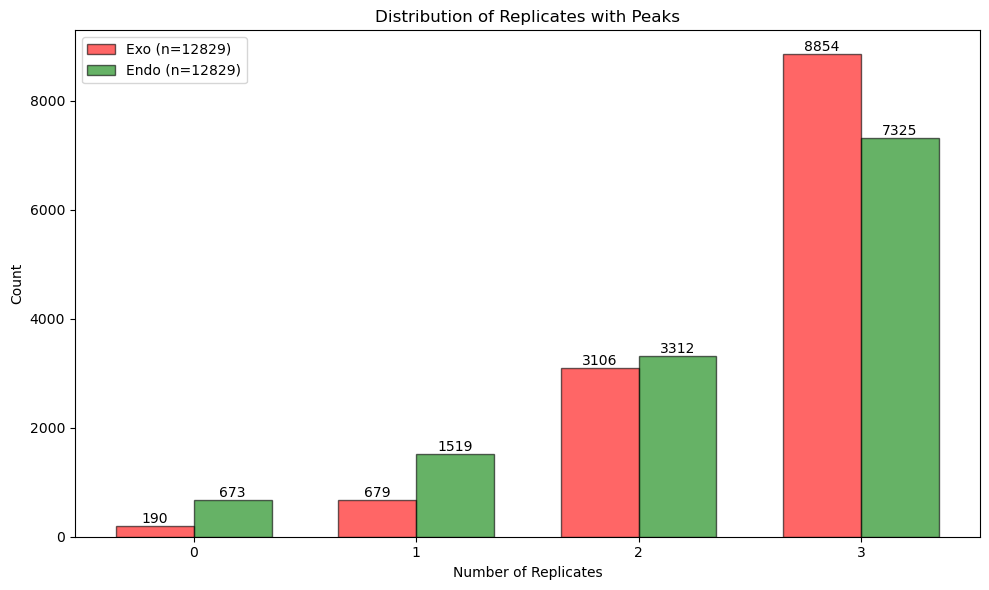

In [190]:
# Create single plot
plt.figure(figsize=(10, 6))

# Get data for plotting
x = np.arange(4)  # 0 through 3 replicates
exo_counts = [len(cpg_enrichment_df[cpg_enrichment_df['exo_replicates_with_peaks'] == i]) for i in range(4)]
endo_counts = [len(cpg_enrichment_df[cpg_enrichment_df['endo_replicates_with_peaks'] == i]) for i in range(4)]

# Plot bars side by side
width = 0.35
plt.bar(x - width/2, exo_counts, width, label=f'Exo (n={sum(exo_counts)})', color='red', alpha=0.6, edgecolor='black')
plt.bar(x + width/2, endo_counts, width, label=f'Endo (n={sum(endo_counts)})', color='green', alpha=0.6, edgecolor='black')

# Add value labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, exo_counts[i], str(exo_counts[i]), 
             ha='center', va='bottom')
    plt.text(x[i] + width/2, endo_counts[i], str(endo_counts[i]),
             ha='center', va='bottom')

plt.title('Distribution of Replicates with Peaks')
plt.xlabel('Number of Replicates')
plt.ylabel('Count')
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.show()

In [191]:
# Sort the DataFrame by enrichment value in descending order
cpg_enrichment_df_sorted = cpg_enrichment_df.sort_values(by='enrichment', ascending=False)

# Split data based on binding type

## By signal value

Non zero signal in minumum 2 replicates

In [192]:
# Split data based on binding type
exo_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'exo_only']
endo_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'endo_only'] 
both_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_signal)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_signal)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_signal)}")


Number of CpG islands bound by exo only: 126
Number of CpG islands bound by endo only: 33
Number of CpG islands bound by both: 12670


## By peaks number

Minimum 2 replicates with peaks

In [193]:
# Split data based on binding type
exo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'exo_only']
endo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'endo_only'] 
both_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_peaks)}")


Number of CpG islands bound by exo only: 2192
Number of CpG islands bound by endo only: 869
Number of CpG islands bound by both: 9768


# Data analysis

## Both: enrichment distribution

In [194]:
print("Summary statistics of enrichment values selected by signal:")
print(both_df_by_signal['enrichment'].describe())

print("\nSummary statistics of enrichment values selected by peaks:")
print(both_df_by_peaks['enrichment'].describe())

Summary statistics of enrichment values selected by signal:
count    12670.000000
mean         1.760810
std          2.648713
min          0.011030
25%          1.005493
50%          1.376620
75%          1.901880
max        145.519579
Name: enrichment, dtype: float64

Summary statistics of enrichment values selected by peaks:
count    9768.000000
mean        1.481978
std         0.752023
min         0.112983
25%         1.002177
50%         1.331595
75%         1.764779
max        14.340946
Name: enrichment, dtype: float64


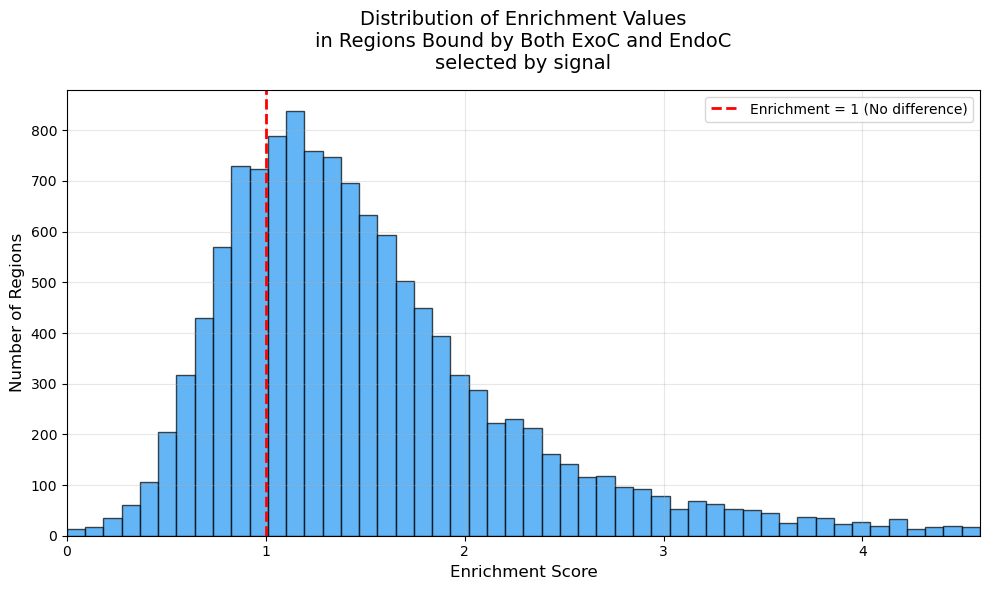

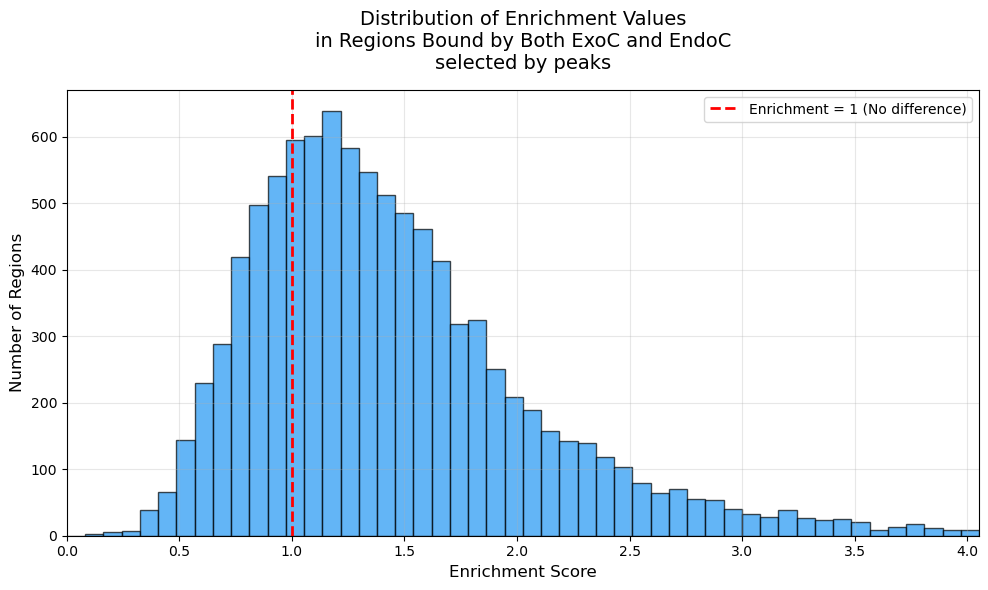

In [195]:
range_min_signal, range_max_signal = plot_enrichment_distribution(both_df_by_signal, title="selected by signal")
range_min_peaks, range_max_peaks = plot_enrichment_distribution(both_df_by_peaks, title="selected by peaks")


## Both: enrichment outliers

In [196]:
outliers_df_signal = both_df_by_signal[both_df_by_signal['enrichment'] > range_max_signal].copy()
print(f"\nNumber of outliers selected by signal(enrichment > {range_max_signal}):", len(outliers_df_signal))

outliers_df_peaks = both_df_by_peaks[both_df_by_peaks['enrichment'] > range_max_peaks].copy()
print(f"\nNumber of outliers selected by peaks(enrichment > {range_max_peaks}):", len(outliers_df_peaks))


Number of outliers selected by signal(enrichment > 4.59104057176528): 388

Number of outliers selected by peaks(enrichment > 4.052585267712184): 110


In [197]:
outliers_df_signal.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
8041,chr4,65124446,65124914,11.989099,0.082388,145.519579,0.333333,both,exo_only,False,2,2,"27.14894235092685,0.0,8.818354424292076","0.1112775205875189,0.0,0.1358871353598072",1726,468,CpG:,1081,2,0,5.03423;4.60311,NaN,65124551,65126277
11895,chr9,24695948,24696360,26.633257,0.261054,102.021948,0.200000,both,exo_only,False,3,2,"1.9792640686035157,48.39018314068134,29.53032275860126","0.6303655184232272,0.1527970424065223,0.0",325,412,CpG:,773,2,0,3.76836;5.87655,NaN,24695936,24696261
10196,chr7,16475558,16476830,25.024436,0.281143,89.009740,0.200000,both,exo_only,False,3,2,"22.89691719561634,22.30488237016239,29.871508025658407","0.16219828857719246,0.0,0.6812297194361251",821,1272,CpG:,710,2,0,4.48563;4.10961,NaN,16476257,16477078
9831,chr6,88446045,88446698,25.803111,0.390391,66.095515,0.200000,both,exo_only,False,3,2,"14.559296809052128,57.02419057397183,5.825846814733791","0.35847557915581596,0.8126981973856662,0.0",1143,653,CpG:,1259,3,0,2.38625;5.40709;9.97263,NaN,88446334,88447477
9940,chr6,116460726,116461210,10.831672,0.181942,59.533679,0.200000,both,exo_only,False,3,2,"9.075827714417795,13.937311828198727,9.481875796303106","0.0,0.24418975367690576,0.30163599779613337",1914,484,CpG:,1473,2,0,3.13125;5.79508,NaN,116460024,116461938


In [198]:
print_outlier_groups(outliers_df_signal, "signal")


First 5 outliers selected by signal:
chr4:65,124,446-65,124,914                        enrichment: 145.5195793968374
chr9:24,695,948-24,696,360                        enrichment: 102.02194788682628
chr7:16,475,558-16,476,830                        enrichment: 89.00973986893229
chr6:88,446,045-88,446,698                        enrichment: 66.0955152414275
chr6:116,460,726-116,461,210                      enrichment: 59.53367947778973

Middle 5 outliers selected by signal:
chr8:84,799,186-84,799,699                        enrichment: 6.244490699852651
chr13:118,714,300-118,714,513                     enrichment: 6.242258120002933
chr7:142,094,379-142,095,510                      enrichment: 6.236447846645635
chr13:23,533,919-23,534,232                       enrichment: 6.212148265714862
chr2:71,543,089-71,543,374                        enrichment: 6.190285047580208

Last 5 outliers selected by signal:
chr3:102,203,760-102,204,765                      enrichment: 4.611711483661346
chr1:9

In [199]:
n_rows = len(outliers_df_signal)

print("\nFirst 5 outliers selected by signal:")
for _, row in outliers_df_signal[:5].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

if n_rows > 10:
    mid_start = n_rows//2 - 2
    print("\nMiddle 5 outliers selected by signal:")
    for _, row in outliers_df_signal[mid_start:mid_start+5].iterrows():
        print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

print("\nLast 5 outliers selected by signal:")
for _, row in outliers_df_signal[-5:].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")


First 5 outliers selected by signal:
chr4:65,124,446-65,124,914                        enrichment: 145.5195793968374
chr9:24,695,948-24,696,360                        enrichment: 102.02194788682628
chr7:16,475,558-16,476,830                        enrichment: 89.00973986893229
chr6:88,446,045-88,446,698                        enrichment: 66.0955152414275
chr6:116,460,726-116,461,210                      enrichment: 59.53367947778973

Middle 5 outliers selected by signal:
chr8:84,799,186-84,799,699                        enrichment: 6.244490699852651
chr13:118,714,300-118,714,513                     enrichment: 6.242258120002933
chr7:142,094,379-142,095,510                      enrichment: 6.236447846645635
chr13:23,533,919-23,534,232                       enrichment: 6.212148265714862
chr2:71,543,089-71,543,374                        enrichment: 6.190285047580208

Last 5 outliers selected by signal:
chr3:102,203,760-102,204,765                      enrichment: 4.611711483661346
chr1:9

In [200]:
print_outlier_groups(outliers_df_peaks, "peaks")


First 5 outliers selected by peaks:
chr2:50,066,300-50,067,004                        enrichment: 14.340946258329229
chr19:4,476,634-4,477,151                         enrichment: 11.91451042057832
chr3:89,430,159-89,430,653                        enrichment: 9.53598105232612
chr11:3,452,179-3,452,683                         enrichment: 7.11770796246212
chr13:23,585,617-23,585,879                       enrichment: 7.037845230868226

Middle 5 outliers selected by peaks:
chr11:66,168,092-66,168,506                       enrichment: 4.921882683407945
chr5:52,476,411-52,476,656                        enrichment: 4.898326148493537
chr9:20,492,516-20,492,906                        enrichment: 4.872548322256861
chr1:132,298,558-132,299,269                      enrichment: 4.853662817882613
chr8:116,993,059-116,993,625                      enrichment: 4.821554039269321

Last 5 outliers selected by peaks:
chr8:117,157,620-117,158,649                      enrichment: 4.111093038842621
chr13:98,2

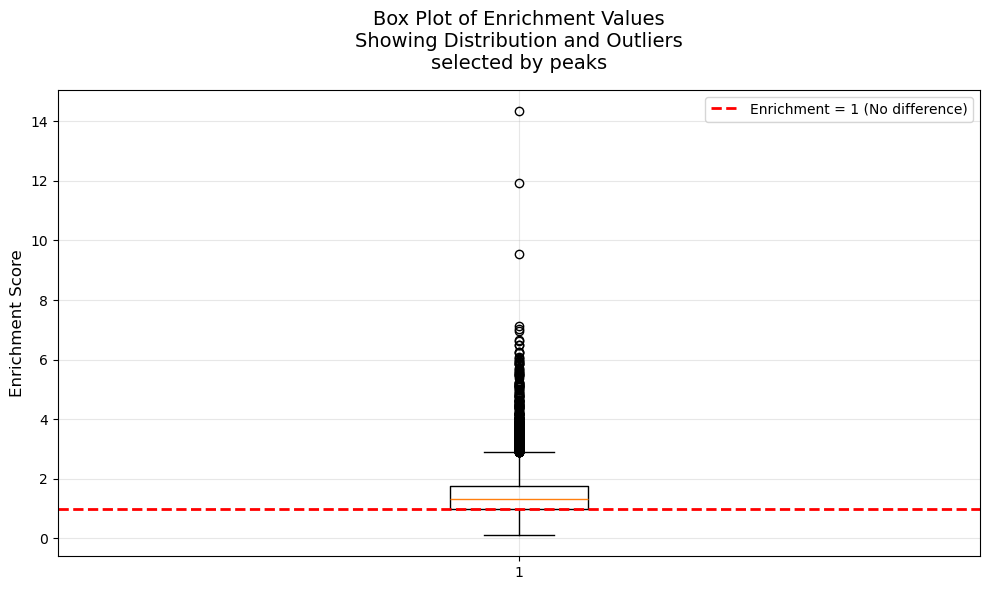

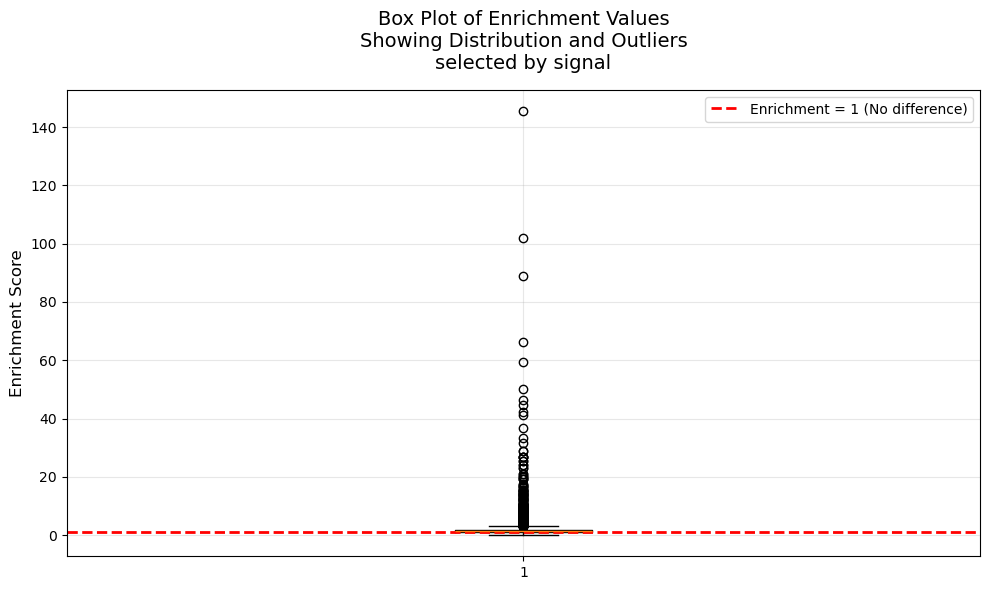

In [201]:
plot_enrichment_boxplot(both_df_by_peaks, title="selected by peaks")
plot_enrichment_boxplot(both_df_by_signal, title="selected by signal")

In [202]:
outliers_df_signal["endo_replicates_with_peaks"].value_counts()

signal_endo_zero_peaks  = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 0]
signal_endo_one_peaks   = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 1]
signal_endo_two_peaks   = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 2]
signal_endo_three_peaks = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 3]

outliers_df_peaks["endo_replicates_with_peaks"].value_counts()

peaks_endo_zero_peaks  = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 0]
peaks_endo_one_peaks   = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 1]
peaks_endo_two_peaks   = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 2]
peaks_endo_three_peaks = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 3]

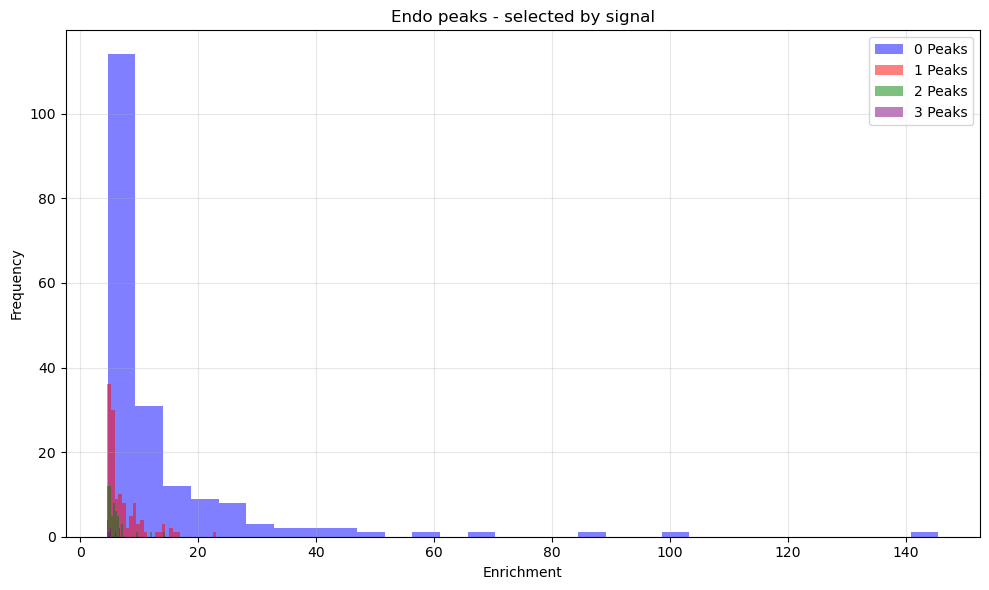

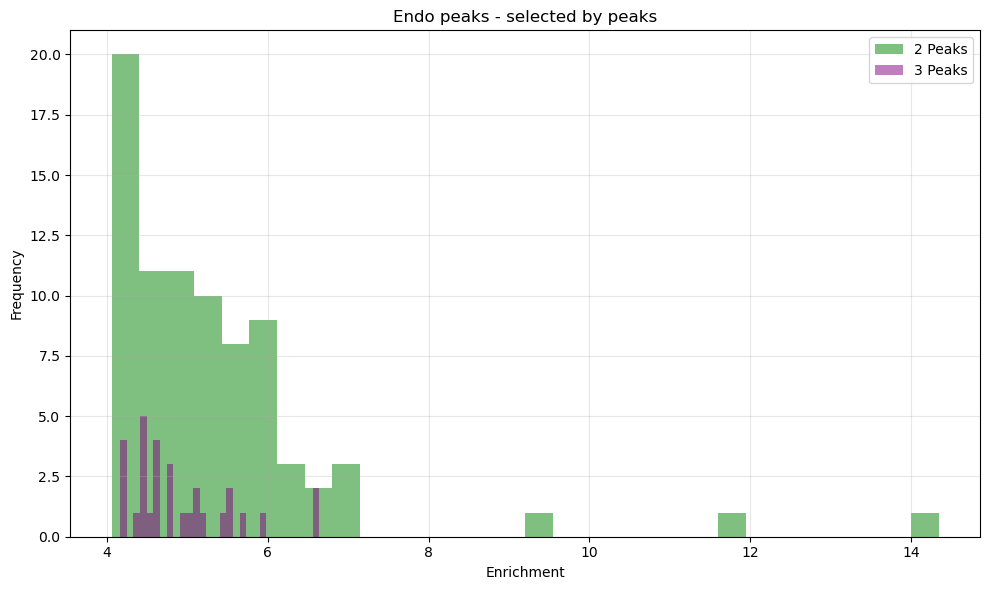

In [203]:
# Classify and plot for signal and peaks outliers
peaks_zero_peaks_signal, peaks_one_peaks_signal, peaks_two_peaks_signal, peaks_three_peaks_signal = plot_by_peaks(outliers_df_signal, peaks_column='endo_replicates_with_peaks', title="Endo peaks - selected by signal")
peaks_zero_peaks_peaks, peaks_one_peaks_peaks, peaks_two_peaks_peaks, peaks_three_peaks_peaks = plot_by_peaks(outliers_df_peaks, peaks_column='endo_replicates_with_peaks', title="Endo peaks - selected by peaks")

In [204]:
print_outlier_groups(peaks_two_peaks_peaks, "peaks")


First 5 outliers selected by peaks:
chr2:50,066,300-50,067,004                        enrichment: 14.340946258329229
chr19:4,476,634-4,477,151                         enrichment: 11.91451042057832
chr3:89,430,159-89,430,653                        enrichment: 9.53598105232612
chr11:3,452,179-3,452,683                         enrichment: 7.11770796246212
chr13:23,585,617-23,585,879                       enrichment: 7.037845230868226

Middle 5 outliers selected by peaks:
chr3:105,458,909-105,459,252                      enrichment: 5.073692327408423
chr19:37,434,266-37,435,575                       enrichment: 5.07172535825533
chr4:15,945,147-15,945,621                        enrichment: 5.020189821646163
chr11:66,168,092-66,168,506                       enrichment: 4.921882683407945
chr5:52,476,411-52,476,656                        enrichment: 4.898326148493537

Last 5 outliers selected by peaks:
chr8:117,157,620-117,158,649                      enrichment: 4.111093038842621
chr13:98,20

In [205]:
print_outlier_groups(peaks_two_peaks_signal, "signal")


First 5 outliers selected by signal:
chr2:50,066,300-50,067,004                        enrichment: 14.340946258329229
chr19:4,476,634-4,477,151                         enrichment: 11.91451042057832
chr3:89,430,159-89,430,653                        enrichment: 9.53598105232612
chr11:3,452,179-3,452,683                         enrichment: 7.11770796246212
chr13:23,585,617-23,585,879                       enrichment: 7.037845230868226

Middle 5 outliers selected by signal:
chr13:76,055,567-76,056,709                       enrichment: 5.541599092507944
chr2:104,122,630-104,123,347                      enrichment: 5.531897383039938
chr7:139,894,761-139,895,076                      enrichment: 5.491983056081965
chr9:86,695,381-86,696,045                        enrichment: 5.448925026546664
chr17:25,808,596-25,809,716                       enrichment: 5.385801611348176

Last 5 outliers selected by signal:
chr6:83,109,003-83,109,669                        enrichment: 4.757896750778365
chr9:31

## Regions length distribution

### Region length - defined by the outermost peaks coordinates

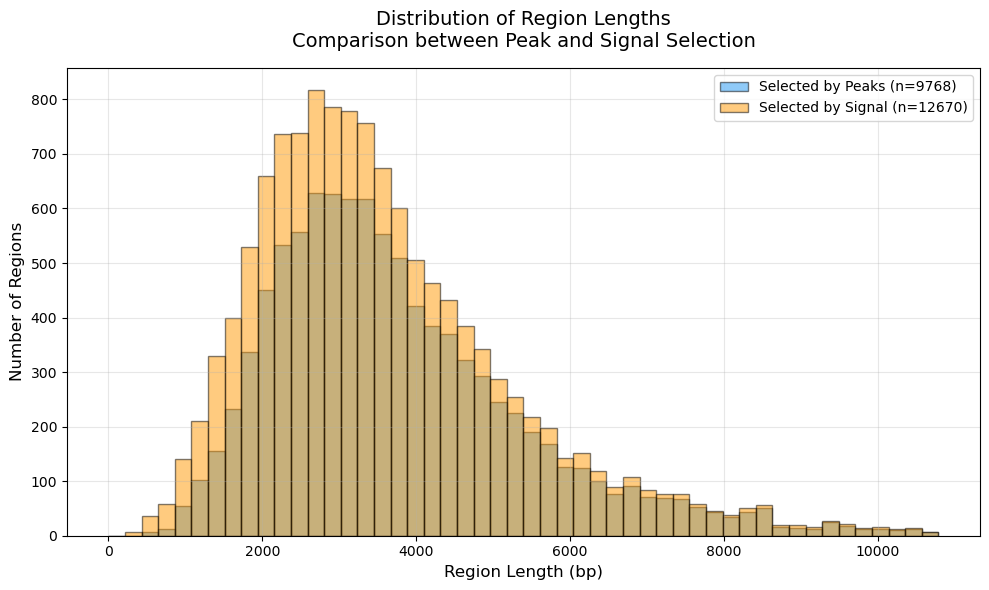

In [206]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='region_length')

In [207]:
both_df_sorted_by_region_length_signal = both_df_by_signal.sort_values(by='region_length', ascending=False)
both_df_sorted_by_region_length_signal.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
10522,chr7,45717703,45718318,31.806518,36.448500,0.872643,1.0,both,both,False,3,3,"33.03791549623241,34.05267709520635,28.32896270983769","46.28682986409696,31.1067631678273,31.95190802204576",21582,615,CpG:,933,3,2,6.44844;4.51086;8.79106,4.89628;11.8479,45700675,45722257
10521,chr7,45714976,45715370,33.748239,41.276677,0.817610,0.4,both,both,False,3,3,"35.39147714133252,35.71502853770806,30.138211381089384","50.575669412973255,38.321259069942876,34.93310139458494",19164,394,CpG:,933,3,3,13.0324;9.20095;9.97968,16.9373;6.68945;11.8479,45700675,45719839
10517,chr7,45704790,45705154,33.748239,41.276677,0.817610,0.4,both,both,False,3,3,"35.39147714133252,35.71502853770806,30.138211381089384","50.575669412973255,38.321259069942876,34.93310139458494",19164,364,CpG:,933,3,3,11.8131;10.0331;11.1781,28.2728;12.7485;11.8479,45700675,45719839
10518,chr7,45705454,45705704,33.748239,41.276677,0.817610,0.4,both,both,False,3,3,"35.39147714133252,35.71502853770806,30.138211381089384","50.575669412973255,38.321259069942876,34.93310139458494",19164,250,CpG:,933,3,3,11.8131;10.0331;11.1781,28.2728;12.7485;11.8479,45700675,45719839
10520,chr7,45713359,45713615,33.748239,41.276677,0.817610,0.4,both,endo_only,False,3,3,"35.39147714133252,35.71502853770806,30.138211381089384","50.575669412973255,38.321259069942876,34.93310139458494",19164,256,CpG:,933,0,3,NaN,6.8612;6.68945;11.8479,45700675,45719839


In [208]:
both_df_sorted_by_region_length_peaks = both_df_by_peaks.sort_values(by='region_length', ascending=False)
both_df_sorted_by_region_length_peaks.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
10522,chr7,45717703,45718318,31.806518,36.448500,0.872643,1.0,both,both,False,3,3,"33.03791549623241,34.05267709520635,28.32896270983769","46.28682986409696,31.1067631678273,31.95190802204576",21582,615,CpG:,933,3,2,6.44844;4.51086;8.79106,4.89628;11.8479,45700675,45722257
10517,chr7,45704790,45705154,33.748239,41.276677,0.817610,0.4,both,both,False,3,3,"35.39147714133252,35.71502853770806,30.138211381089384","50.575669412973255,38.321259069942876,34.93310139458494",19164,364,CpG:,933,3,3,11.8131;10.0331;11.1781,28.2728;12.7485;11.8479,45700675,45719839
10519,chr7,45706651,45707060,33.748239,41.276677,0.817610,0.4,both,both,False,3,3,"35.39147714133252,35.71502853770806,30.138211381089384","50.575669412973255,38.321259069942876,34.93310139458494",19164,409,CpG:,933,2,3,3.31782;10.0331,4.31391;12.7485;11.8479,45700675,45719839
10518,chr7,45705454,45705704,33.748239,41.276677,0.817610,0.4,both,both,False,3,3,"35.39147714133252,35.71502853770806,30.138211381089384","50.575669412973255,38.321259069942876,34.93310139458494",19164,250,CpG:,933,3,3,11.8131;10.0331;11.1781,28.2728;12.7485;11.8479,45700675,45719839
10521,chr7,45714976,45715370,33.748239,41.276677,0.817610,0.4,both,both,False,3,3,"35.39147714133252,35.71502853770806,30.138211381089384","50.575669412973255,38.321259069942876,34.93310139458494",19164,394,CpG:,933,3,3,13.0324;9.20095;9.97968,16.9373;6.68945;11.8479,45700675,45719839


In [209]:
print_outlier_groups(both_df_sorted_by_region_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr7:45,717,703-45,718,318                        enrichment: 0.8726427185530012
chr7:45,704,790-45,705,154                        enrichment: 0.8176103741579192
chr7:45,706,651-45,707,060                        enrichment: 0.8176103741579192
chr7:45,705,454-45,705,704                        enrichment: 0.8176103741579192
chr7:45,714,976-45,715,370                        enrichment: 0.8176103741579192

Middle 5 outliers selected by peaks:
chr11:115,628,181-115,628,442                     enrichment: 0.74157678452607
chr13:35,968,256-35,969,565                       enrichment: 1.5472840348819747
chr5:114,667,490-114,667,939                      enrichment: 2.1185967616407684
chr13:44,902,779-44,903,193                       enrichment: 2.8587861932104466
chr7:109,752,051-109,752,610                      enrichment: 2.686144574063227

Last 5 outliers selected by peaks:
chr11:53,324,604-53,324,817                       enrichment: 2.083658113680123
ch

In [210]:
print_outlier_groups(both_df_sorted_by_region_length_signal, "signal")


First 5 outliers selected by signal:
chr7:45,717,703-45,718,318                        enrichment: 0.8726427185530012
chr7:45,714,976-45,715,370                        enrichment: 0.8176103741579192
chr7:45,704,790-45,705,154                        enrichment: 0.8176103741579192
chr7:45,705,454-45,705,704                        enrichment: 0.8176103741579192
chr7:45,713,359-45,713,615                        enrichment: 0.8176103741579192

Middle 5 outliers selected by signal:
chr13:103,773,833-103,774,725                     enrichment: 1.8777932805533064
chr14:45,219,318-45,220,490                       enrichment: 1.0760744864866991
chr13:60,601,761-60,602,653                       enrichment: 1.6231440350343456
chr2:50,066,300-50,067,004                        enrichment: 14.340946258329229
chr5:52,565,848-52,566,398                        enrichment: 1.924229059632505

Last 5 outliers selected by signal:
chr4:132,535,499-132,535,959                      enrichment: 1.4379352055146

### CpG length - defined by the CpG coordinates

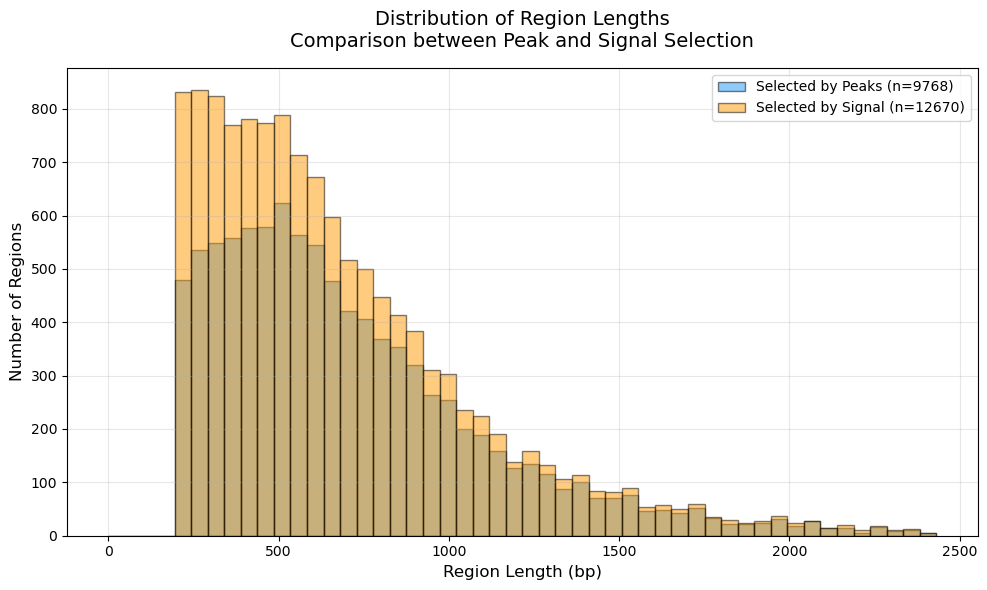

In [211]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='cpg_length')

In [212]:
both_df_sorted_by_cpg_length_peaks = both_df_by_peaks.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_peaks.head()
print_outlier_groups(both_df_sorted_by_cpg_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr8:92,355,697-92,360,826                        enrichment: 1.631518113187943
chr5:33,430,439-33,435,552                        enrichment: 2.037166655415914
chrX:12,086,982-12,092,060                        enrichment: 1.1126597809526018
chrX:12,076,861-12,081,915                        enrichment: 1.3044556383340078
chr17:34,118,396-34,122,981                       enrichment: 1.0309508872445343

Middle 5 outliers selected by peaks:
chr19:4,942,565-4,943,186                         enrichment: 1.181983597204067
chr6:56,797,254-56,797,875                        enrichment: 1.9258944277208927
chr1:60,098,156-60,098,777                        enrichment: 1.2187037063945363
chr10:81,350,076-81,350,696                       enrichment: 0.641584913689705
chr13:43,398,213-43,398,833                       enrichment: 1.2193285177890762

Last 5 outliers selected by peaks:
chr14:77,874,781-77,874,982                       enrichment: 2.7117929246705907
ch

In [213]:
both_df_sorted_by_cpg_length_signal = both_df_by_signal.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_signal.head()
print_outlier_groups(both_df_sorted_by_cpg_length_signal, "signal")


First 5 outliers selected by signal:
chr8:92,355,697-92,360,826                        enrichment: 1.631518113187943
chr5:33,430,439-33,435,552                        enrichment: 2.037166655415914
chrX:12,086,982-12,092,060                        enrichment: 1.1126597809526018
chrX:12,076,861-12,081,915                        enrichment: 1.3044556383340078
chr17:34,118,396-34,122,981                       enrichment: 1.0309508872445343

Middle 5 outliers selected by signal:
chr8:94,386,178-94,386,763                        enrichment: 1.2577798252977797
chrX:53,056,746-53,057,331                        enrichment: 1.0322595570126845
chr5:110,176,496-110,177,081                      enrichment: 1.2084677764758012
chr4:116,820,953-116,821,538                      enrichment: 2.907234639604573
chr9:121,838,954-121,839,539                      enrichment: 1.536061518327246

Last 5 outliers selected by signal:
chr9:41,376,488-41,376,689                        enrichment: 1.443753750463023


# Exo only

In [214]:
exo_only_df_by_peaks.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
6085,chr19,44734343,44735056,15.453329,0.0,inf,1.0,exo_only,exo_only,False,2,0,"0.0,8.257254110088892,38.10273315233162","0.0,0.0,0.0",1087,713,CpG:,926,2,0,6.33438;4.07766,NaN,44734499,44735586
3330,chr13,96748199,96748403,33.173716,0.0,inf,1.0,exo_only,exo_only,False,2,0,"55.65521597415767,43.86593215027998,0.0","0.0,0.0,0.0",267,204,CpG:,1323,2,0,5.32714;4.40742,NaN,96748259,96748526
12797,chrX,159414230,159415517,15.982540,0.0,inf,1.0,exo_only,exo_only,False,3,0,"6.530822352008576,12.00851120687891,29.40828514321164","0.0,0.0,0.0",859,1287,CpG:,1801,2,0,3.18458;3.75447,NaN,159413536,159414395
12819,chrX,168122986,168123301,17.661884,0.0,inf,1.0,exo_only,exo_only,False,2,0,"29.36382449578945,23.621828120347168,0.0","0.0,0.0,0.0",974,315,CpG:,1867,2,0,3.28488;4.05905,NaN,168122898,168123872
5293,chr17,68003884,68004335,52.088128,0.0,inf,1.0,exo_only,exo_only,False,3,0,"58.904634082973196,22.413534491579124,74.94621410184693","0.0,0.0,0.0",309,451,CpG:,1103,2,0,7.68799;2.60943,NaN,68004184,68004493


In [215]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'region_length', 'cpg_length', 'pvalue']

stats_df = exo_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("Exo only - by peaks, size:", len(exo_only_df_by_peaks))
stats_df

Exo only - by peaks, size: 2192


,exo_signal,endo_signal,enrichment,region_length,cpg_length,pvalue
count,2192.000000,2192.000000,2162.000000,2192.000000,2192.000000,2192.000000
mean,20.978256,9.938491,4.788403,2823.163777,602.957117,0.471594
std,10.365348,8.153862,17.494166,1586.718981,415.029125,0.318089
min,2.828104,0.000000,0.265995,267.000000,201.000000,0.100000
25%,14.199746,5.162853,1.454750,1738.500000,318.000000,0.200000
50%,18.928822,8.424264,2.182325,2512.000000,485.000000,0.400000
75%,25.539389,12.749427,3.612405,3533.500000,745.000000,0.700000
max,126.552148,105.738918,497.676069,13619.000000,3388.000000,1.000000


In [216]:
stats_df = exo_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("Exo only - by signal, size:", len(exo_only_df_by_signal))
stats_df

Exo only - by signal, size: 126


,exo_signal,endo_signal,enrichment,region_length,cpg_length,pvalue
count,126.000000,126.000000,96.000000,126.000000,126.000000,126.000000
mean,18.933008,2.528809,34.711849,1268.126984,616.563492,0.783069
std,8.803885,3.501246,72.198017,690.423116,469.746732,0.225359
min,2.610753,0.000000,0.370688,267.000000,201.000000,0.500000
25%,13.082354,0.058089,3.494993,797.500000,328.250000,0.500000
50%,16.988029,1.121255,8.893094,1156.500000,435.000000,0.833333
75%,22.735562,3.596718,26.718899,1590.500000,697.500000,1.000000
max,52.088128,17.419247,497.676069,3910.000000,2455.000000,1.000000


In [217]:
print_across_distribution(exo_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr19:44,734,343-44,735,056                       enrichment: inf
chr13:96,748,199-96,748,403                       enrichment: inf
chrX:159,414,230-159,415,517                      enrichment: inf
chrX:168,122,986-168,123,301                      enrichment: inf
chr17:68,003,884-68,004,335                       enrichment: inf

Middle 5 elements selected by peaks:
chr7:127,421,784-127,422,149                      enrichment: 2.211985300369866
chr5:92,602,977-92,603,574                        enrichment: 2.2096362382304746
chr5:137,289,060-137,289,264                      enrichment: 2.208387626531345
chr6:115,037,547-115,037,959                      enrichment: 2.204423328402279
chr9:123,366,754-123,367,131                      enrichment: 2.202420723618302

Last 5 elements selected by peaks:
chrX:144,317,870-144,319,407                      enrichment: 0.4426185350631362
chr3:54,633,257-54,633,725                        enrichment: 0.4015986336821

In [218]:
print_across_distribution(exo_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr19:44,734,343-44,735,056                       enrichment: inf
chr13:96,748,199-96,748,403                       enrichment: inf
chrX:159,414,230-159,415,517                      enrichment: inf
chrX:168,122,986-168,123,301                      enrichment: inf
chr17:68,003,884-68,004,335                       enrichment: inf

Middle 5 elements selected by signal:
chr6:85,190,026-85,190,668                        enrichment: 16.580399507868847
chr7:4,829,972-4,830,224                          enrichment: 16.04840218433418
chr9:11,277,646-11,277,855                        enrichment: 14.966585154321155
chr8:3,495,872-3,496,387                          enrichment: 14.665406156975546
chr19:24,897,236-24,897,571                       enrichment: 14.121306895669113

Last 5 elements selected by signal:
chr5:37,163,077-37,163,496                        enrichment: 1.1763198690079877
chr13:49,383,202-49,383,461                       enrichment: 1.1277587

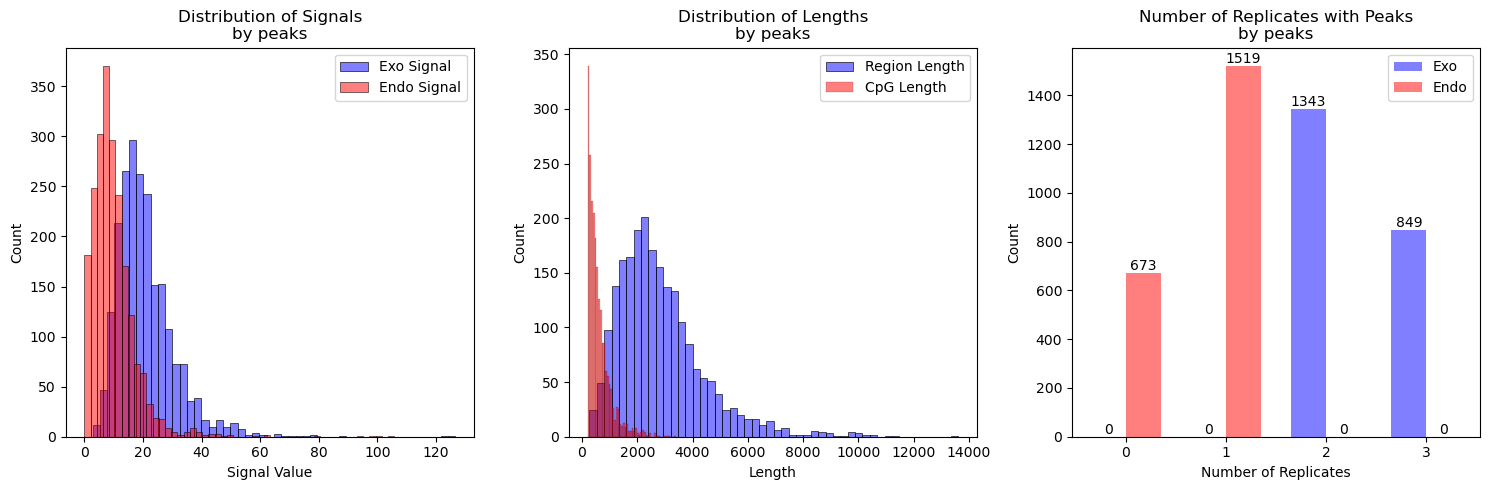

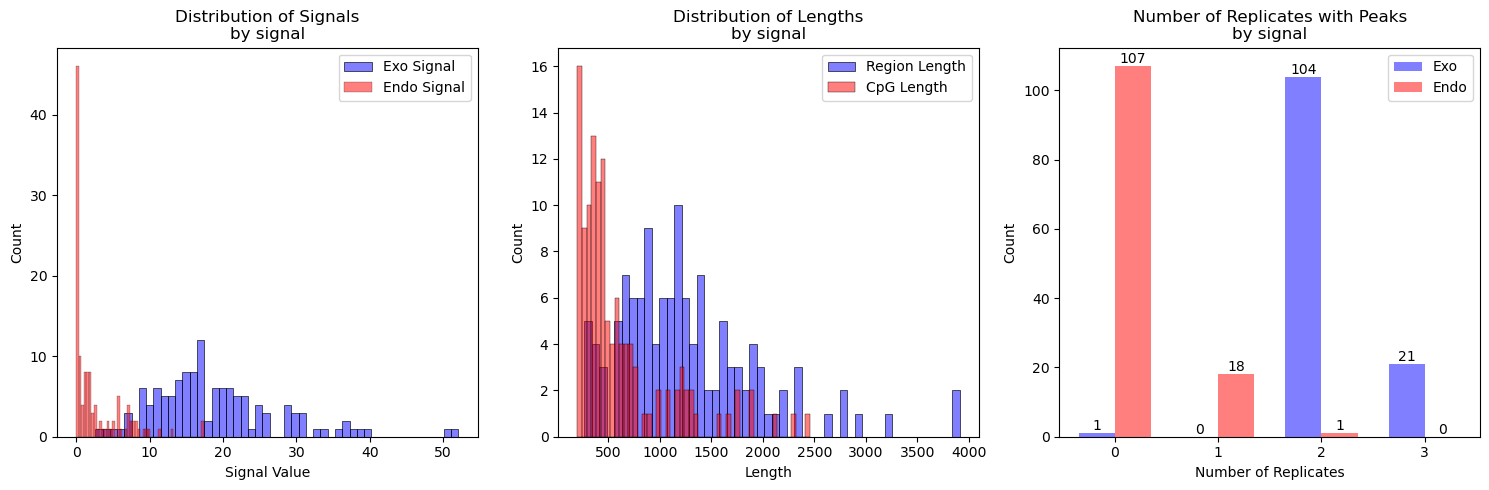

In [219]:
plot_exo_only_distributions(exo_only_df_by_peaks, title="by peaks")
plot_exo_only_distributions(exo_only_df_by_signal, title="by signal")

# Endo only

In [220]:
endo_only_df_by_peaks.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
12179,chr9,70421360,70421597,61.827268,10.302819,6.001005,0.200000,both,endo_only,False,3,2,"44.74028507498234,43.928635934865255,96.81288319690381","9.861722594709377,0.0,21.046734541346073",966,237,CpG:,1122,1,2,10.3562,6.92217;3.89107,70421337,70422303
11633,chr8,109340687,109340906,27.210157,5.955271,4.569088,0.800000,both,endo_only,False,3,2,"2.1730924359074346,30.2704248624574,49.186955039883834","6.145289321004609,11.720524305178795,0.0",972,219,CpG:,1419,1,2,8.56165,4.05046;2.47276,109340499,109341471
9864,chr6,91978786,91979172,18.709944,4.271491,4.380190,0.333333,both,endo_only,False,2,2,"41.276998671853214,14.85283340991417,0.0","7.6630098186077165,0.0,5.151463840477326",1569,386,CpG:,1286,1,2,7.12388,2.53021;3.98389,91978393,91979962
4810,chr17,6316722,6317055,39.685678,9.807757,4.046356,0.100000,both,endo_only,False,3,3,"34.11591483296931,43.90720083451875,41.03391691546027","12.332644686548873,13.989066709853645,3.101558258052249",1303,333,CpG:,633,0,2,NaN,8.74633;4.63397,6316663,6317966
12518,chrX,6047291,6048447,4.925249,1.232368,3.996573,0.800000,both,endo_only,False,2,3,"14.462088896420772,0.31365664067392596,0.0","1.1854913860619187,0.225376479531736,2.286235886410068",1497,1156,CpG:,631,1,2,5.99032,3.79532;2.61013,6047453,6048950


In [221]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'region_length', 'cpg_length', 'pvalue']

stats_df = endo_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("endo only - by peaks, size:", len(endo_only_df_by_peaks))
stats_df

endo only - by peaks, size: 869


,exo_signal,endo_signal,enrichment,region_length,cpg_length,pvalue
count,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,14.446658,17.617021,0.948743,3036.112773,510.273878,0.629037
std,14.407498,20.586967,0.633615,1807.643721,324.178289,0.311623
min,0.000000,1.232368,0.000000,285.000000,201.000000,0.100000
25%,7.678349,10.887529,0.536349,1801.000000,282.000000,0.400000
50%,12.146128,14.544376,0.835861,2657.000000,404.000000,0.700000
75%,18.173451,19.304582,1.199646,3857.000000,631.000000,1.000000
max,325.121711,517.668363,6.001005,19164.000000,2807.000000,1.000000


In [222]:
stats_df = endo_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("endo only - by signal, size:", len(endo_only_df_by_signal))
stats_df

endo only - by signal, size: 33


,exo_signal,endo_signal,enrichment,region_length,cpg_length,pvalue
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,3.773340,16.673455,0.337733,1440.969697,438.848485,0.702020
std,5.843080,16.919392,0.617413,594.139003,279.102369,0.211466
min,0.000000,4.389919,0.000000,285.000000,202.000000,0.500000
25%,0.227234,8.782935,0.027252,1118.000000,252.000000,0.500000
50%,1.775698,12.663701,0.120578,1301.000000,337.000000,0.666667
75%,3.770671,18.171459,0.299170,1858.000000,542.000000,1.000000
max,22.932079,97.139428,2.610981,2636.000000,1569.000000,1.000000


In [223]:
print_across_distribution(endo_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr9:70,421,360-70,421,597                        enrichment: 6.001004947942953
chr8:109,340,687-109,340,906                      enrichment: 4.569087870625404
chr6:91,978,786-91,979,172                        enrichment: 4.380190211087848
chr17:6,316,722-6,317,055                         enrichment: 4.046356301700913
chrX:6,047,291-6,048,447                          enrichment: 3.996573136224991

Middle 5 elements selected by peaks:
chr3:89,322,861-89,323,083                        enrichment: 0.8377795733092531
chr5:143,293,313-143,293,710                      enrichment: 0.8372084464074034
chr4:155,491,035-155,492,522                      enrichment: 0.8358610611683236
chr15:76,368,838-76,369,595                       enrichment: 0.8336872240055342
chr8:70,768,452-70,768,902                        enrichment: 0.8321354065618565

Last 5 elements selected by peaks:
chr6:90,325,047-90,325,311                        enrichment: 0.0049210728200335
chr

In [224]:
print_across_distribution(endo_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr2:178,119,043-178,119,439                      enrichment: 2.6109812760886784
chr13:104,863,566-104,863,806                     enrichment: 1.9545402163001075
chr2:4,603,471-4,604,164                          enrichment: 1.948825380667688
chr16:97,763,144-97,763,933                       enrichment: 0.6557822616096142
chr13:94,876,988-94,877,530                       enrichment: 0.4346484784970261

Middle 5 elements selected by signal:
chr2:158,695,912-158,696,204                      enrichment: 0.1631644687893789
chr13:94,868,576-94,868,895                       enrichment: 0.1537358407721022
chr4:11,385,344-11,385,695                        enrichment: 0.120578270870554
chr4:11,387,026-11,388,595                        enrichment: 0.1195589922820339
chr14:69,796,944-69,797,162                       enrichment: 0.1152298958173529

Last 5 elements selected by signal:
chr6:90,325,047-90,325,311                        enrichment: 0.00492107282003

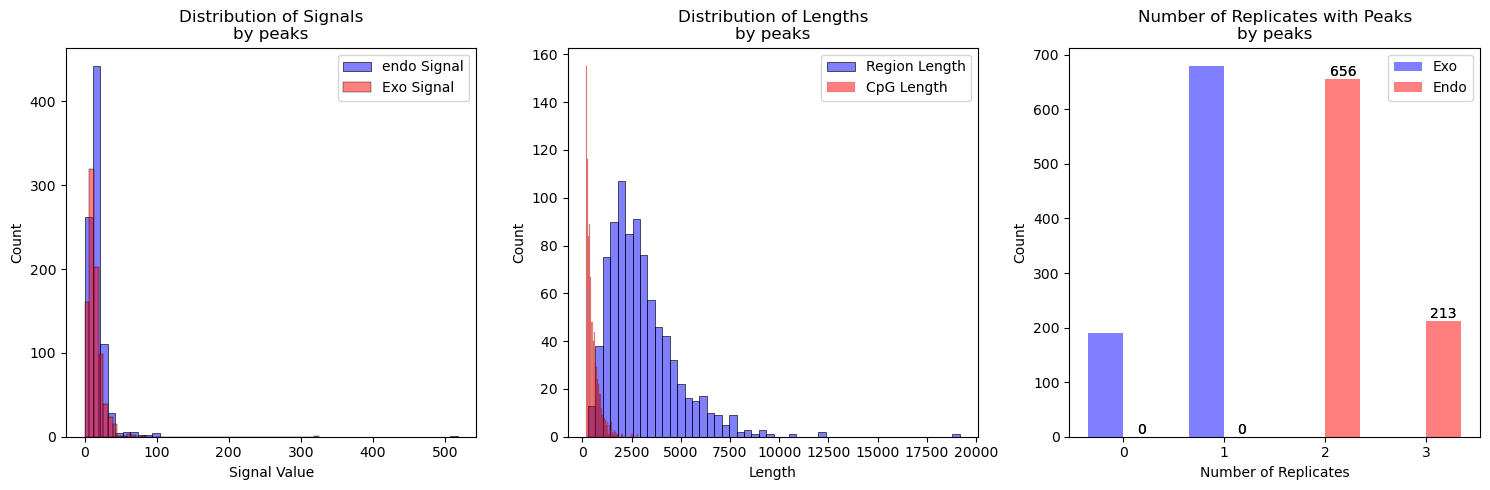

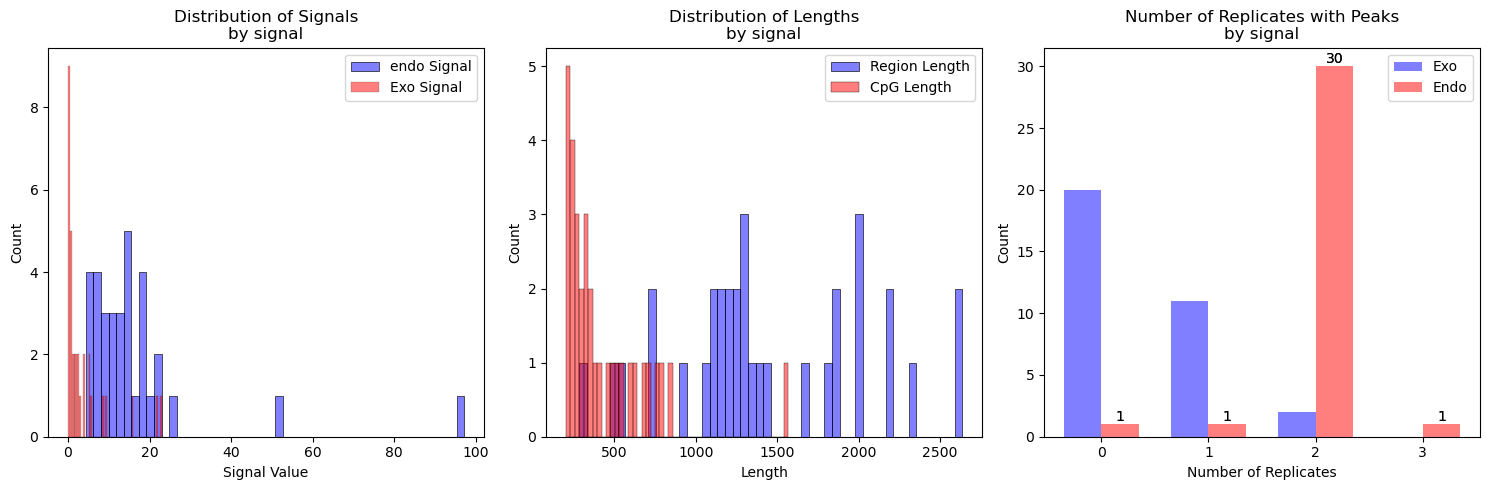

In [225]:
plot_endo_only_distributions(endo_only_df_by_peaks, title="by peaks")
plot_endo_only_distributions(endo_only_df_by_signal, title="by signal")

# Create output files

## UP in Exo

In [226]:
up_enriched_signal_1 = both_df_by_signal[(both_df_by_signal['enrichment'] > 1) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
up_enriched_signal_1_5 = both_df_by_signal[(both_df_by_signal['enrichment'] > 1.5) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()    
up_enriched_signal_2 = both_df_by_signal[(both_df_by_signal['enrichment'] > 2) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
up_enriched_peaks_1 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 1) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
up_enriched_peaks_1_5 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 1.5) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()    
up_enriched_peaks_2 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 2) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()

In [227]:
print("up_enriched_signal_1.shape:",   up_enriched_signal_1.shape)
print("up_enriched_signal_1_5.shape:", up_enriched_signal_1_5.shape)
print("up_enriched_signal_2.shape:",   up_enriched_signal_2.shape)
print("up_enriched_peaks_1.shape:",    up_enriched_peaks_1.shape)
print("up_enriched_peaks_1_5.shape:",  up_enriched_peaks_1_5.shape)
print("up_enriched_peaks_2.shape:",    up_enriched_peaks_2.shape)

up_enriched_signal_1.shape: (9159, 24)
up_enriched_signal_1_5.shape: (5029, 24)
up_enriched_signal_2.shape: (2427, 24)
up_enriched_peaks_1.shape: (7233, 24)
up_enriched_peaks_1_5.shape: (3694, 24)
up_enriched_peaks_2.shape: (1545, 24)


## UP in Endo

In [228]:
down_enriched_signal_1 = both_df_by_signal[(both_df_by_signal['enrichment'] < 1.0 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_signal_08 = both_df_by_signal[(both_df_by_signal['enrichment'] < 0.8 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_signal_05 = both_df_by_signal[(both_df_by_signal['enrichment'] < 0.5 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_peaks_1 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 1.0) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
down_enriched_peaks_08 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 0.8) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
down_enriched_peaks_05 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 0.5) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()


In [229]:
print("down_enriched_signal_1.shape:",  down_enriched_signal_1.shape)
print("down_enriched_signal_08.shape:", down_enriched_signal_08.shape)
print("down_enriched_signal_05.shape:", down_enriched_signal_05.shape)
print("down_enriched_peaks_1.shape:",   down_enriched_peaks_1.shape)
print("down_enriched_peaks_08.shape:",  down_enriched_peaks_08.shape)
print("down_enriched_peaks_05.shape:",  down_enriched_peaks_05.shape)

down_enriched_signal_1.shape: (3123, 24)
down_enriched_signal_08.shape: (1586, 24)
down_enriched_signal_05.shape: (311, 24)
down_enriched_peaks_1.shape: (2425, 24)
down_enriched_peaks_08.shape: (1131, 24)
down_enriched_peaks_05.shape: (139, 24)


## Save output files

In [230]:
up_enriched_signal_1.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_1.csv', index=False)
up_enriched_signal_1_5.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_1_5.csv', index=False)
up_enriched_signal_2.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_2.csv', index=False)
up_enriched_peaks_1.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_1.csv', index=False)
up_enriched_peaks_1_5.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_1_5.csv', index=False)
up_enriched_peaks_2.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_2.csv', index=False)

down_enriched_signal_1.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_1.csv', index=False)
down_enriched_signal_08.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_08.csv', index=False)
down_enriched_signal_05.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_05.csv', index=False)
down_enriched_peaks_1.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_1.csv', index=False)
down_enriched_peaks_08.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_08.csv', index=False)
down_enriched_peaks_05.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_05.csv', index=False)

exo_only_df_by_signal.to_csv(f'{OUTPUT_LISTS_PATH}/exo_only_df_by_signal.csv', index=False)
endo_only_df_by_signal.to_csv(f'{OUTPUT_LISTS_PATH}/endo_only_df_by_signal.csv', index=False)
exo_only_df_by_peaks.to_csv(f'{OUTPUT_LISTS_PATH}/exo_only_df_by_peaks.csv', index=False)
endo_only_df_by_peaks.to_csv(f'{OUTPUT_LISTS_PATH}/endo_only_df_by_peaks.csv', index=False)